In [1]:
# Load dependencies
import numpy as np
import matplotlib.pyplot as plt

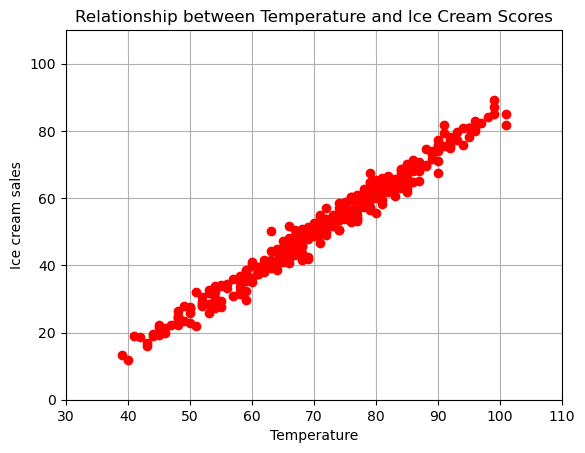

In [2]:
points = np.genfromtxt("Icecream_temperatures.csv", delimiter=",") # instead of pandas, we use numpy to load the data


fig, ax = plt.subplots()  # creates a figure and an axes object
ax.plot(points[:,0], points[:,1], 'ro')
ax.axis([30, 110, 0, 110]) # set the limits of the axis
ax.set(xlabel='Temperature', ylabel='Ice cream sales',
       title='Relationship between Temperature and Ice Cream Scores')
ax.grid() # show the grid
plt.show()



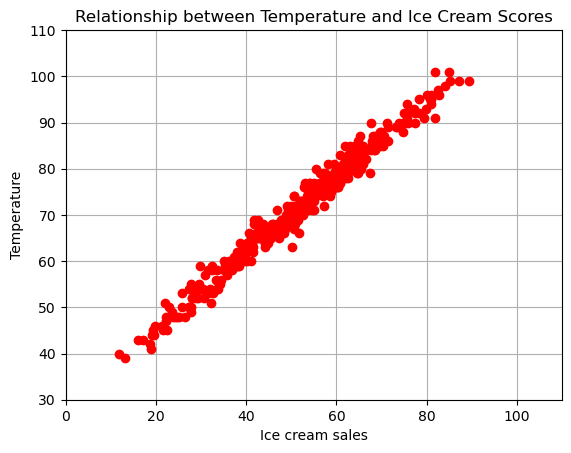

In [3]:
fig, ax = plt.subplots()  # creates a figure and an axes object
ax.plot(points[:,1], points[:,0], 'ro') 
ax.axis([0, 110,30, 110, ]) # set the limits of the axis
ax.set(ylabel='Temperature', xlabel='Ice cream sales',
       title='Relationship between Temperature and Ice Cream Scores')
ax.grid() # show the grid
plt.show()

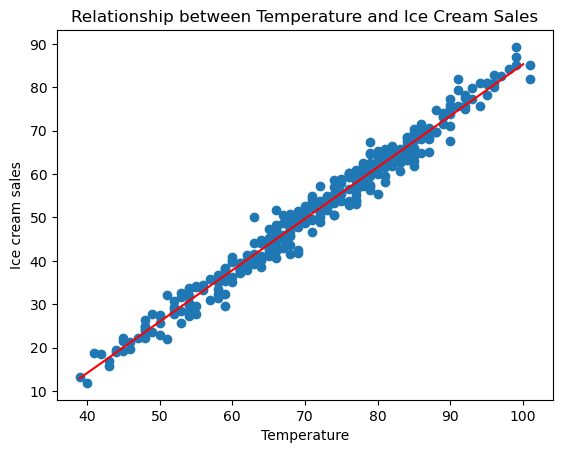

[ 92.  92.  93.  93.  94.  94.  95.  95.  95.  95.  96.  96.  96.  97.
  98.  99.  99.  99. 101. 101.]
[75.82456912 75.82456912 77.01144286 77.01144286 78.1983166  78.1983166
 79.38519035 79.38519035 79.38519035 79.38519035 80.57206409 80.57206409
 80.57206409 81.75893784 82.94581158 84.13268532 84.13268532 84.13268532
 86.50643281 86.50643281]


In [4]:
from sklearn.linear_model import LinearRegression   # sklearn is a library for ML models
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from importlib import reload   
plt=reload(plt)                # a hack needed because previously we assigned an object (namely, "ax") to "plt"


x=points[1:,0] #here we remove the heading (text)
y=points[1:,1] #here we remove the heading (text)

# Split the data into training/testing sets
x_train = x[:-20]
x_test = x[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

# Create linear regression object
model = LinearRegression(fit_intercept=True)

# Train the model using the training sets
model.fit(x_train[:, np.newaxis], y_train)

xfit = np.linspace(39, 100, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x,y)

plt.plot(xfit, yfit,'r');
plt.ylabel("Ice cream sales")
plt.xlabel("Temperature")
plt.title("Relationship between Temperature and Ice Cream Sales")
plt.show()

# Create predictions for the test set 
print(x_test)
reshaped_arr = x_test.reshape(-1, 1)  # needs to be reshaped as a column for the function to work
#print(reshaped_arr)
predicted_sales = model.predict(reshaped_arr )
print(predicted_sales)

Text(0.5, 0, 'real sales')

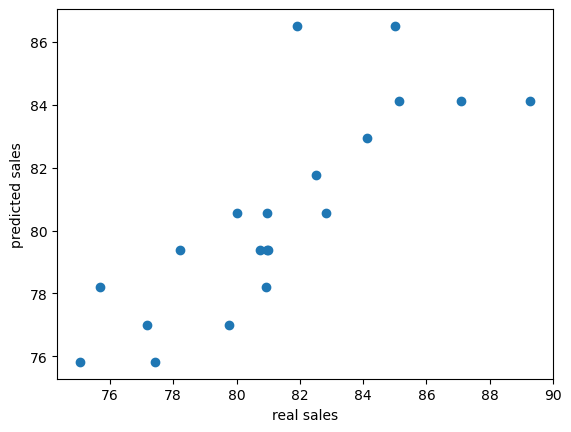

In [6]:
plt.plot(y_test, predicted_sales,'o');

plt.ylabel("predicted sales")
plt.xlabel("real sales")

Text(0.5, 0, 'temperature')

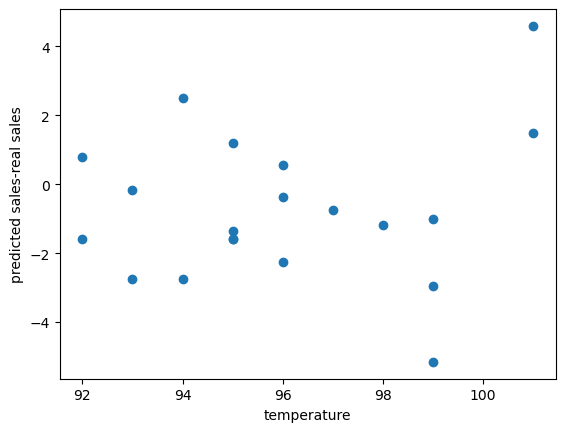

In [11]:
plt.plot(x_test, predicted_sales-y_test,'o'); #residuals

plt.ylabel("predicted sales-real sales")
plt.xlabel("temperature")